In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

/Users/akito_harada/Documents/python/stats/ml/venv/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
# データ数、次元、非ゼロ要素数
n, d, s = 30, 50, 10

In [3]:
# データ生成
beta = np.r_[np.ones(s), np.zeros(d-s)]
beta.shape

(50,)

In [4]:
X = np.random.randn(n, d)
y = np.dot(X, beta) + np.random.normal(scale = 0.01, size = n)
print(X.shape, y.shape)

(30, 50) (30,)


In [5]:
la = sm.OLS(y, X).fit_regularized(alpha= 0.1, L1_wt=1) # ラッソ
ri = sm.OLS(y, X).fit_regularized(alpha=0.1, L1_wt=0) # リッジ

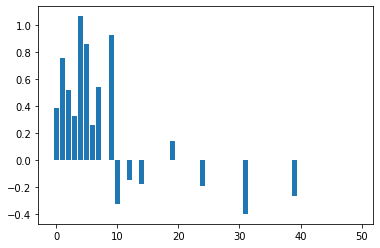

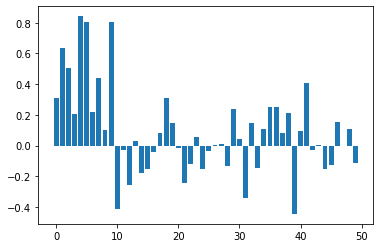

In [6]:
# プロット
plt.bar(np.arange(d), la.params); plt.show() # ラッソ
plt.bar(np.arange(d), ri.params); plt.show() # リッジ

In [7]:
# 正則化パラメータを変化させたときのプロット
from sklearn import linear_model # lasso_pathを使う

In [8]:
# ラッソの正則化パスの計算
alphas, coef_pass, _ = linear_model.lasso_path(X, y)
print(alphas.shape, coef_pass.shape)

(100,) (50, 100)


In [9]:
# 正則化パラメータごとに回帰係数のL1ノルムを計算
coefL1 = np.sum(np.abs(coef_pass), axis = 0)
coefL1.shape

(100,)

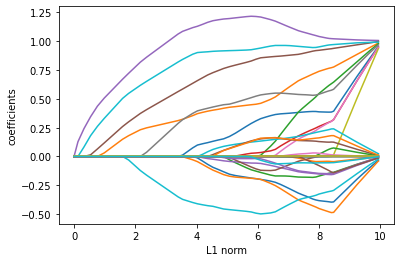

In [10]:
# プロット
plt.xlabel('L1 norm')
plt.ylabel('coefficients')
for i in np.arange(d):
    plt.plot(coefL1, coef_pass[i, :])
plt.show()

In [11]:
# 推定値を計算する正則化パラメータalphaの候補
alphas = np.logspace(np.log10(10 ** -3), np.log10(10 ** 3), 100)
coefs = []
for a in alphas:
    ri = sm.OLS(y, X).fit_regularized(alpha=a, L1_wt=0) # リッジ回帰
    coefs.append(ri.params)
print(np.array(coefs).shape)
coef_path = np.array(coefs).T
coef_path.shape

(100, 50)


(50, 100)

In [12]:
# 各正則化パラメータにおける回帰係数のL1ノルムを計算
coefL1 = np.sum(np.abs(coef_path), axis = 0)
coefL1.shape

(100,)

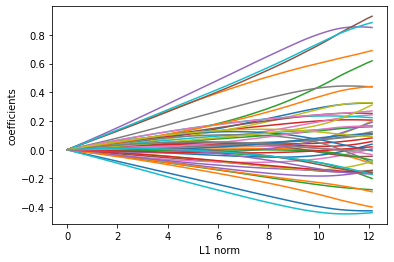

In [13]:
# プロット
plt.xlabel('L1 norm')
plt.ylabel('coefficients')
for i in np.arange(d):
    plt.plot(coefL1, coef_path[i, :])
plt.show();

In [14]:
# エラスティックネット
# 設定: データ数、次元、非ゼロ係数の数
n, d, s = 100, 200, 30

In [15]:
beta = np.r_[np.ones(s), np.zeros(d-s)] # 真のパラメータ

In [16]:
# データ生成
X = np.random.randn(n, d)
y = np.dot(X, beta) + np.random.normal(scale = 0.01, size = n)

In [17]:
# エラスティックネットの正規化パス : w = 0.3
_, coef_path, _ = linear_model.enet_path(X, y, l1_ratio=0.3)
coefL1 = np.sum(np.abs(coef_path), axis = 0)
# coef_path!=０を指定することにより、0以外の値を持つ個数を得ている
nonzeros = np.sum(coef_path!=0, axis = 0)
print(nonzeros)

[  1   1   1   3   3   4   7   8  10  12  15  18  19  25  28  33  35  37
  42  46  54  58  62  64  64  69  72  76  77  80  85  85  89  89  92  93
  94  96  97  99 101 103 104 105 106 108 109 113 115 119 120 122 123 125
 129 130 132 133 135 135 137 138 139 141 141 140 139 140 140 140 140 141
 141 143 143 143 143 143 143 143 143 143 143 143 143 143 142 142 142 142
 142 142 142 141 141 141 141 141 141 141]


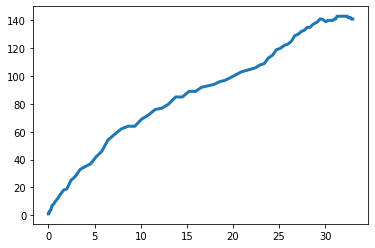

In [18]:
# プロット: エラスティックネットの正則化パス
plt.plot(coefL1, nonzeros, linestyle='solid', lw = 3, label='elastic net')

In [19]:
# ラッソの正則化パス
_, coef_path, _ = linear_model.lasso_path(X, y)
coefL1 = np.sum(np.abs(coef_path), axis = 0)
nonzeros = np.sum(coef_path != 0, axis = 0)

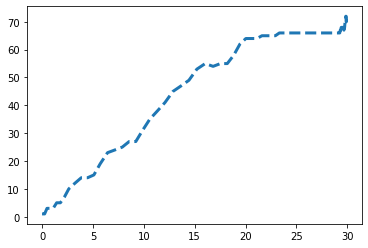

In [20]:
# プロット: ラッソの正則化パス
plt.plot(coefL1, nonzeros, linestyle='dashed', lw = 3, label = 'Lasso')

In [21]:
# スパースモデリング
# スパース性とは: 画像のスパース性とは、体内の画像は同一の物質内ではおおよそのっぺりとしていて、隣り合う画素間で画素値が大きく変化する箇所はわずか（物質と物質との境界のみ）しかないといった性質を指します。 注目すべきポイントがわずかであれば、必要なデータ数は少なくてすみます

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
n, d, s = 100, 200, 30 # 設定: データ数, 次元, 非ゼロ要素数
# パラメータ設定
beta = np.r_[np.ones(s), np.zeros(d-s)] # 真のパラメータ

In [24]:
# データ生成
X = np.random.randn(n, d)
y = (np.dot(X,beta) + np.random.normal(scale = 0.001, size = n) >= 0)
alpha = 1 # 正則化パラメータ : 1/C
# solver='liblinear'　を入れてやらないとエラーになるよ！！
slr = LogisticRegression(penalty='l1', C = 1/alpha, solver='liblinear') # L1正則化
slr.fit(X, y)
rlr = LogisticRegression(penalty='l2', C = 1/alpha, solver='liblinear') # L2正則化
rlr.fit(X, y)

LogisticRegression(solver='liblinear')

In [25]:
slr.coef_.shape

(1, 200)

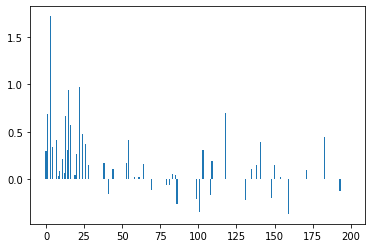

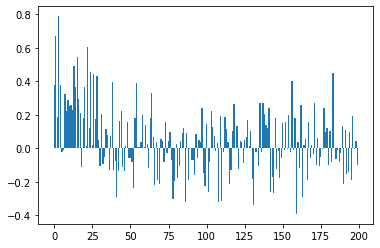

In [26]:
plt.bar(np.arange(d), slr.coef_[0]); plt.show()
plt.bar(np.arange(d), rlr.coef_[0]); plt.show()

In [27]:
from sklearn.svm import l1_min_c

In [28]:
slr = LogisticRegression(penalty='l1', solver='liblinear')

In [29]:
# 正則化パラメータの範囲を指定
cs = l1_min_c(X, y, loss = 'log') * np.logspace(-2, 3)
print(cs, len(cs))
coefs = []
for c in cs:
    slr.set_params(C = c).fit(X, y) # 各Cでの回帰係数を推定
    coefs.append(slr.coef_[0])
coef_path = np.array(coefs).T
coefL1 = np.sum(np.abs(coef_path), axis = 0) # 回帰係数のL1ノルム


[5.03441346e-04 6.36780413e-04 8.05435027e-04 1.01875870e-03
 1.28858225e-03 1.62986998e-03 2.06154955e-03 2.60756170e-03
 3.29818802e-03 4.17173033e-03 5.27663487e-03 6.67417914e-03
 8.44187031e-03 1.06777437e-02 1.35057998e-02 1.70828814e-02
 2.16073716e-02 2.73301967e-02 3.45687419e-02 4.37244535e-02
 5.53051031e-02 6.99529482e-02 8.84803515e-02 1.11914834e-01
 1.41556062e-01 1.79047923e-01 2.26469700e-01 2.86451381e-01
 3.62319524e-01 4.58281740e-01 5.79660050e-01 7.33186038e-01
 9.27374185e-01 1.17299408e+00 1.48366768e+00 1.87662480e+00
 2.37365867e+00 3.00233455e+00 3.79751852e+00 4.80331111e+00
 6.07549311e+00 7.68461916e+00 9.71993063e+00 1.22943050e+01
 1.55505158e+01 1.96691510e+01 2.48786283e+01 3.14678627e+01
 3.98022904e+01 5.03441346e+01] 50


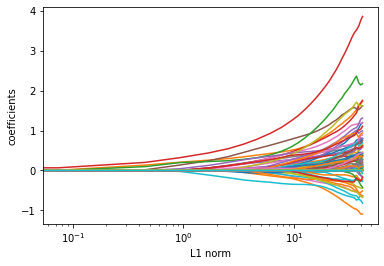

In [30]:
# プロット準備
plt.xlabel('L1 norm');plt.xscale('log');plt.ylabel('coefficients')

# 回帰係数ごとにプロット
for i in np.arange(d):
    plt.plot(coefL1, coef_path[i, :])
plt.show();

In [31]:
from sklearn.covariance import GraphicalLassoCV
from sklearn import datasets

In [32]:
d, n = 10, 100 # 次元, サンプル数

In [33]:
# スパース正定値行列の生成: 非対角要素が0になる確率は0.8
P = datasets.make_sparse_spd_matrix(d, alpha=0.8)

In [34]:
# Pの逆行列を分散共分散行列にもつ多次元正規分布からデータを生成
cov = np.linalg.inv(P)
X = np.random.multivariate_normal(np.zeros(d), cov, size = n)

In [35]:
# スパース精度行列の推定。正則化パラメータは交差検証法で選択
gl = GraphicalLassoCV()
gl.fit(X)

GraphicalLassoCV()

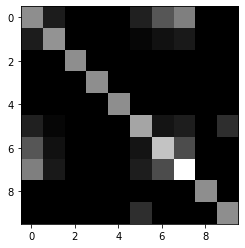

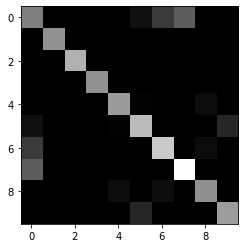

In [36]:
plt.imshow(np.abs(P), 'gray') #真の精度行列
plt.show();
plt.imshow(np.abs(gl.precision_), 'gray') # 推定結果
plt.show();

/Users/akito_harada/Documents/python/stats/ml/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: The cv_alphas_ attribute is deprecated in version 0.24 in favor of cv_results_['alpha'] and will be removed in version 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
/Users/akito_harada/Documents/python/stats/ml/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: The grid_scores_ attribute is deprecated in version 0.24 in favor of cv_results_ and will be removed in version 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


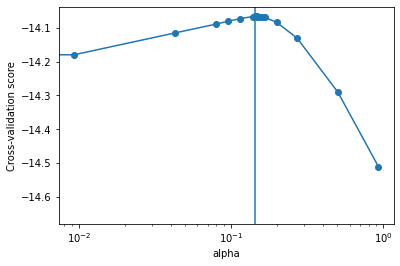

0.14361689414520662

In [37]:
# 交差検証法の結果をプロット
plt.ylabel('Cross-validation score')
plt.xlabel('alpha')
plt.xscale('log')
plt.plot(gl.cv_alphas_, np.mean(gl.grid_scores_, axis = 1), 'o-')
plt.axvline(gl.alpha_)
plt.show()
gl.alpha_

In [50]:
from PIL import Image

In [51]:
# 辞書学習関連ツール
from sklearn.decomposition import MiniBatchDictionaryLearning
from sklearn.feature_extraction.image import extract_patches_2d

In [73]:
# 画像ファイル名
imfiles = ['boat.png', 'goldhill.png', 'barbara512.bmp', 'pepper512.bmp']
patch_size = (8, 8) # パッチサイズ
# 未初期化の配列を生成する(別のやり方でもいいよ！)
# imgs = np.empty((0, np.prod(patch_size)))
# print(imgs.shape)
imgs = np.array([])

In [74]:
for f in imfiles:
    # np.asarrayを使えば、元のNumpy配列と同期され続けるコピーを作る
    im = np.asarray(Image.open('data/'+f))
    imp = extract_patches_2d(im, patch_size)
    imgs = np.append(imgs, imp.reshape(imp.shape[0], -1))
imgs = imgs.reshape(-1, 64)
imgs.shape

(1020100, 64)

In [77]:
imgs = np.array(imgs)

In [80]:
# 元画像の画像パッチ(imgs)をランダムに100枚選ぶ
pi = imgs[np.random.choice(np.arange(imgs.shape[0]), 100, replace = False), :]

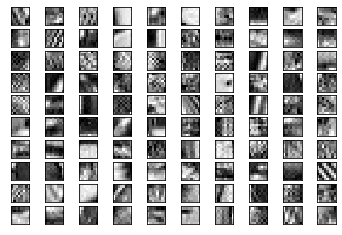

In [83]:
for i, comp in enumerate(pi[:100]):
    plt.subplot(10, 10, i+1)
    plt.imshow(comp.reshape(patch_size),  #行列をプロット
              cmap = plt.cm.gray_r, interpolation='nearest')
    plt.xticks(());plt.yticks(())
plt.show();

In [84]:
DL = MiniBatchDictionaryLearning(n_components=100, alpha=100, n_iter=3000)
DT = DL.fit(imgs).components_ # Dの転置行列

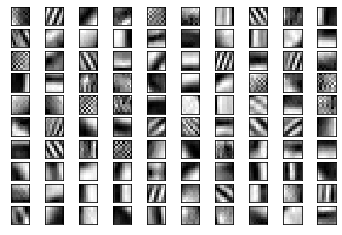

In [85]:
for i, m in enumerate(DT[: 100]):
    plt.subplot(10, 10, i+1)
    plt.imshow(m.reshape(patch_size),
              cmap = plt.cm.gray_r, interpolation = 'nearest')
    plt.xticks(());plt.yticks(())
plt.show();

In [ ]:
from sklearn.feature_extraction.image import reconstruct_from_patches_2d

In [ ]:
# 元画像
image_true = np.asarray(Image.open('data/lenna.png'))
h, w = image_true.shape
noisemat = 50 * np.random.randn(h, w) * np.random.choice([0, 1], size = w* h, p = [0.5, 0.5]).reshape(h, w)

# ノイズを付加した画像
# NumPy配列ndarrayの要素の値を任意の範囲内に収めるクリッピング処理を行うにはnp.clip()またはndarrayのclip()メソッドを使う。引数に最小値と最大値を指定すると、その範囲外の値は最小値または最大値に置き換えられる。
image_noise = np.clip(np.round(image_true + noisemat), 0, 255)

In [ ]:
# 画像パッチの切りだし
data = extract_patches_2d(image_noise, patch_size)
data = data.reshape(data.shape[0], -1)

In [ ]:
# スパース表現の構成
UT = DL.transform(data)  # U = (u_1, u_2, ・・・u_n)の転置
print(UT.shape)

In [ ]:
# 画像パッチの再構成
reconst_patch = np.dot(UT, DT).reshape(len(data), *patch_size)
image_denoise = reconstruct_from_patches_2d(reconst_patch, (h, w))

In [ ]:
# プロット: 元画像
plt.tick_params(labelbottom = False, labelleft = False, labelright =False, labeltop = False, color = 'white')
plt.imshow(image_true, cmap ='gray')
plt.show();

In [ ]:
# プロット: ノイズを付加した画像
plt.tick_params(labelbottom = False, labelleft = False, labelright =False, labeltop = False, color = 'white')
plt.imshow(image_noise, cmap ='gray')
plt.show();

In [ ]:
# プロット: ノイズを除去した画像
plt.tick_params(labelbottom = False, labelleft = False, labelright =False, labeltop = False, color = 'white')
plt.imshow(np.asarray(image_denoise), cmap ='gray')
plt.show();